In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta

# Simstrat Output File

Open the file. Column headers are depth in m. Datetime needs to be converted from days since 1981

In [2]:
df = pd.read_csv("example.dat")
df['Datetime'] = pd.Timestamp("1981-01-01") + pd.to_timedelta(df['Datetime'], unit='D')
df

,Datetime,-309.000,-308.000,-307.000,-306.000,-305.000,-304.000,-303.000,-302.000,-301.000,...,-9.000,-8.000,-7.000,-6.000,-5.000,-4.000,-3.000,-2.000,-1.000,-0.000
0,1981-01-01 01:00:02.880000000,4.5000,4.5000,4.5000,4.5000,4.5000,4.5000,4.5000,4.5000,4.5000,...,5.5072,5.5094,5.5116,5.5138,5.5160,5.5182,5.5204,5.5226,5.5248,5.5265
1,1981-01-01 04:00:02.879999999,4.5001,4.5001,4.5000,4.5000,4.5000,4.5000,4.5000,4.5000,4.5000,...,5.4968,5.4959,5.4947,5.4934,5.4917,5.4894,5.4858,5.4812,5.4730,5.4606
2,1981-01-01 07:00:02.880000000,4.5003,4.5002,4.5001,4.5001,4.5000,4.5000,4.5000,4.5000,4.5000,...,5.4750,5.4741,5.4728,5.4714,5.4693,5.4670,5.4634,5.4594,5.4504,5.4370
3,1981-01-01 10:00:02.880000000,4.5004,4.5002,4.5001,4.5001,4.5001,4.5000,4.5000,4.5000,4.5000,...,5.4607,5.4600,5.4590,5.4579,5.4562,5.4545,5.4519,5.4485,5.4419,5.4311
4,1981-01-01 13:00:02.880000000,4.5004,4.5003,4.5002,4.5001,4.5001,4.5001,4.5001,4.5000,4.5000,...,5.4542,5.4539,5.4535,5.4529,5.4520,5.4511,5.4495,5.4472,5.4425,5.4347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128010,2024-10-23 10:00:02.880000000,7.2231,7.2230,7.2229,7.2228,7.2228,7.2227,7.2227,7.2227,7.2226,...,13.9870,14.0220,14.0300,14.0310,14.0310,14.0310,14.0310,14.0310,14.0300,14.0280
128011,2024-10-23 13:00:02.880000000,7.2231,7.2230,7.2229,7.2228,7.2228,7.2227,7.2227,7.2227,7.2226,...,13.9850,14.0210,14.0370,14.0440,14.0490,14.0580,14.0690,14.0720,14.0720,14.0700
128012,2024-10-23 16:00:02.880000000,7.2231,7.2230,7.2229,7.2228,7.2228,7.2227,7.2227,7.2227,7.2227,...,13.9790,14.0170,14.0420,14.0550,14.0570,14.0570,14.0570,14.0560,14.0540,14.0490
128013,2024-10-23 19:00:02.880000000,7.2231,7.2230,7.2229,7.2228,7.2228,7.2228,7.2227,7.2227,7.2227,...,13.9760,14.0210,14.0330,14.0320,14.0320,14.0310,14.0300,14.0280,14.0250,14.0160


## Plot results

<Axes: xlabel='Datetime', ylabel='Depth (m)'>

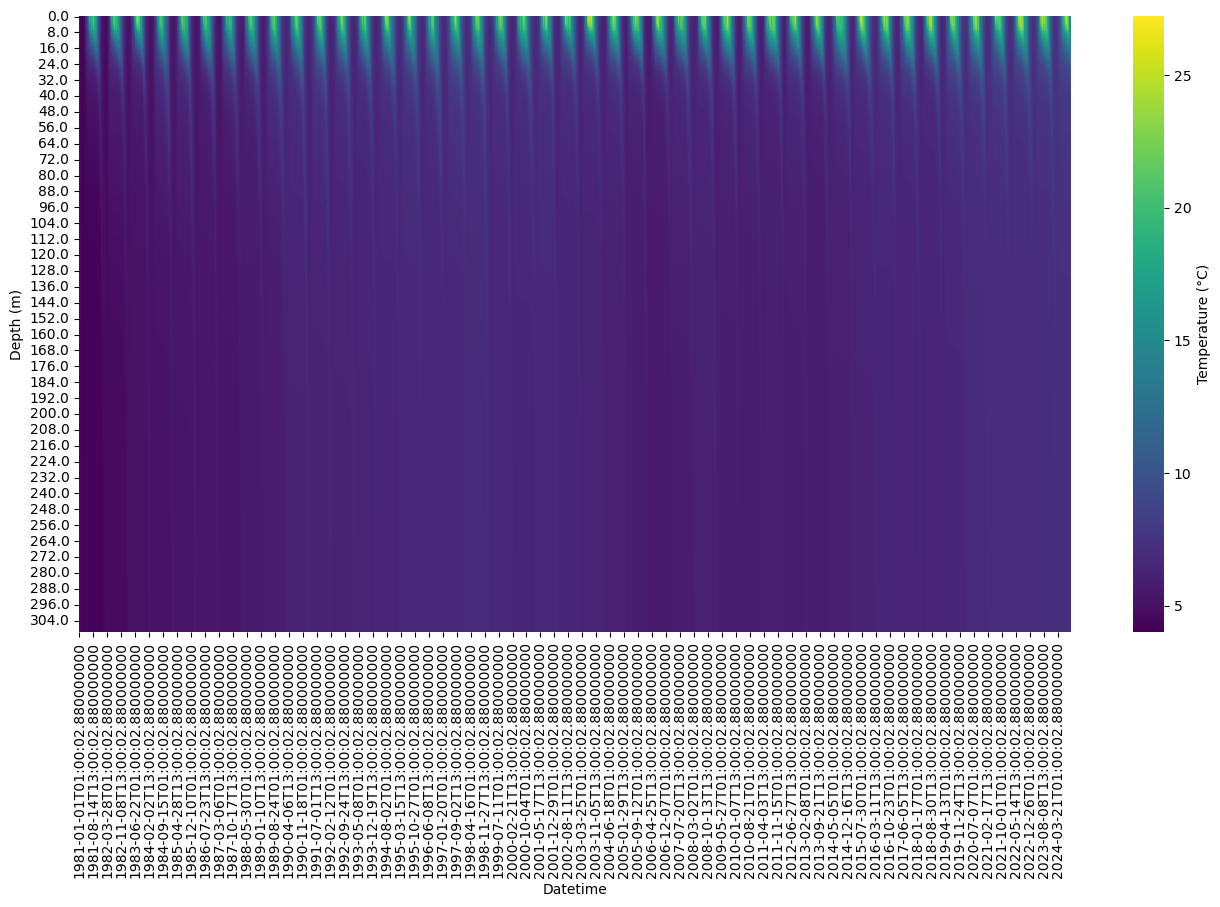

In [3]:
df_melted = df.melt(id_vars=['Datetime'], var_name='Depth (m)', value_name='Temperature')
df_melted['Depth (m)'] = df_melted['Depth (m)'].astype(float) * -1
heatmap_data = df_melted.pivot(index="Depth (m)", columns="Datetime", values="Temperature")
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap="viridis", cbar_kws={'label': 'Temperature (°C)'})